### Compare the results from the Ultralytics models after tuning

In [5]:
models_best_scores = {
    "yolov9": {
        "score": {'metrics/precision(B)': 0.56218, 'metrics/recall(B)': 0.63326, 'metrics/mAP50(B)': 0.63259, 'metrics/mAP50-95(B)': 0.44113, 'val/box_loss': 1.00198, 'val/cls_loss': 0.94036, 'val/dfl_loss': 1.08101, 'fitness': 0.46028},
        "conf_matrix_path": "/home/etaylor/code_projects/thesis/src/segmentation/notebooks/ultralytics/runs/detect/train32/confusion_matrix.png",
        "normalized_conf_matrix_path": "/home/etaylor/code_projects/thesis/src/segmentation/notebooks/ultralytics/runs/detect/train32/confusion_matrix_normalized.png",
        "results_path": "/home/etaylor/code_projects/thesis/src/segmentation/notebooks/ultralytics/runs/detect/train32/results.png"    
    },
    "yolov8x": {
        "score": {'metrics/precision(B)': 0.56324, 'metrics/recall(B)': 0.68724, 'metrics/mAP50(B)': 0.64771, 'metrics/mAP50-95(B)': 0.44157, 'val/box_loss': 0.8831, 'val/cls_loss': 0.98716, 'val/dfl_loss': 0.8443, 'fitness': 0.46218},
        "conf_matrix_path": "/home/etaylor/code_projects/thesis/src/segmentation/notebooks/ultralytics/runs/detect/train36/confusion_matrix.png",
        "normalized_conf_matrix_path": "/home/etaylor/code_projects/thesis/src/segmentation/notebooks/ultralytics/runs/detect/train36/confusion_matrix_normalized.png",
        "results_path": "/home/etaylor/code_projects/thesis/src/segmentation/notebooks/ultralytics/runs/detect/train36/results.png"
    },
}

Model: yolov9
Score: {'metrics/precision(B)': 0.56218, 'metrics/recall(B)': 0.63326, 'metrics/mAP50(B)': 0.63259, 'metrics/mAP50-95(B)': 0.44113, 'val/box_loss': 1.00198, 'val/cls_loss': 0.94036, 'val/dfl_loss': 1.08101, 'fitness': 0.46028}


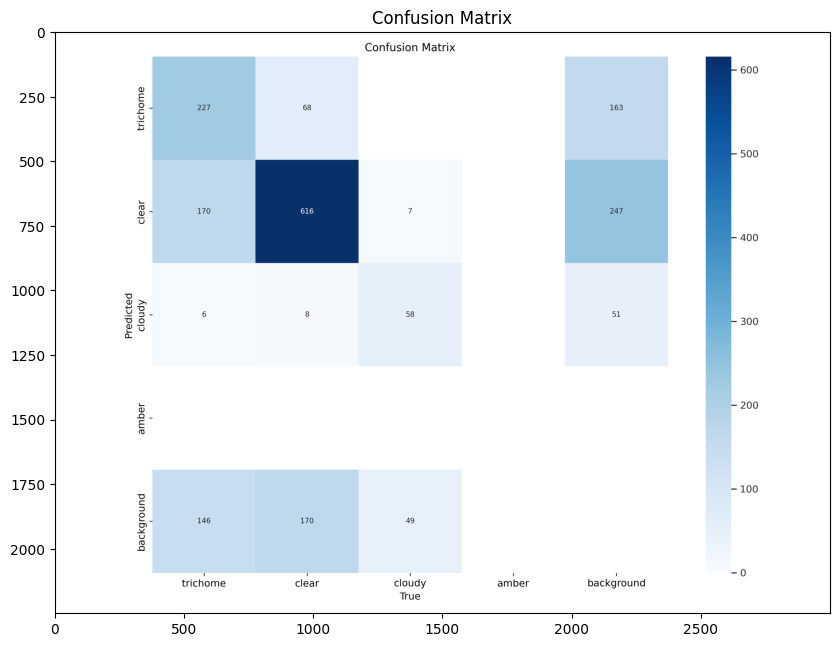

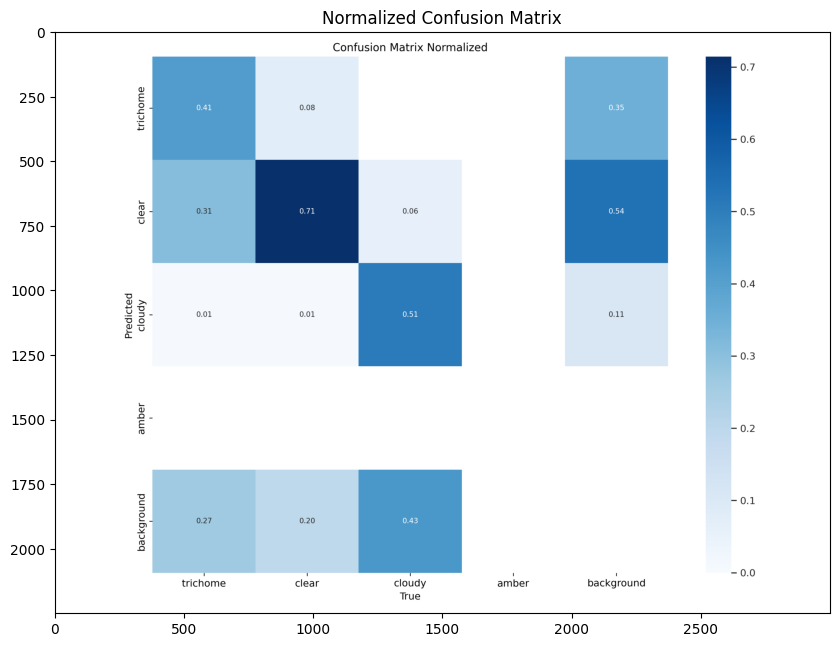

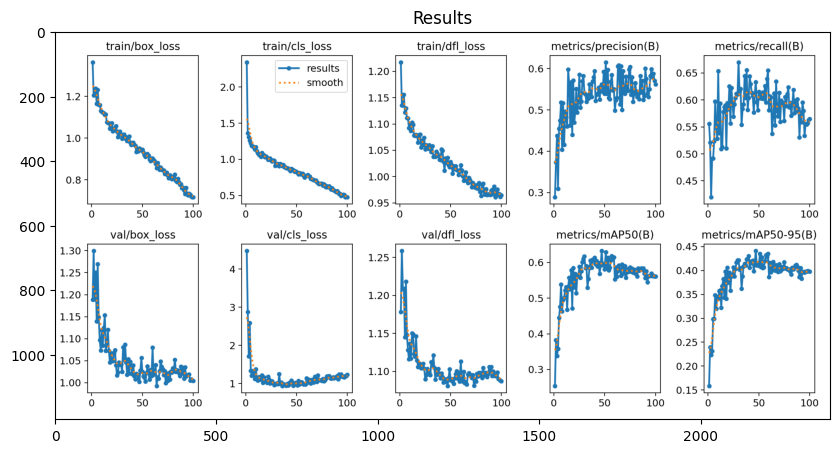

Model: yolov8x
Score: {'metrics/precision(B)': 0.56324, 'metrics/recall(B)': 0.68724, 'metrics/mAP50(B)': 0.64771, 'metrics/mAP50-95(B)': 0.44157, 'val/box_loss': 0.8831, 'val/cls_loss': 0.98716, 'val/dfl_loss': 0.8443, 'fitness': 0.46218}


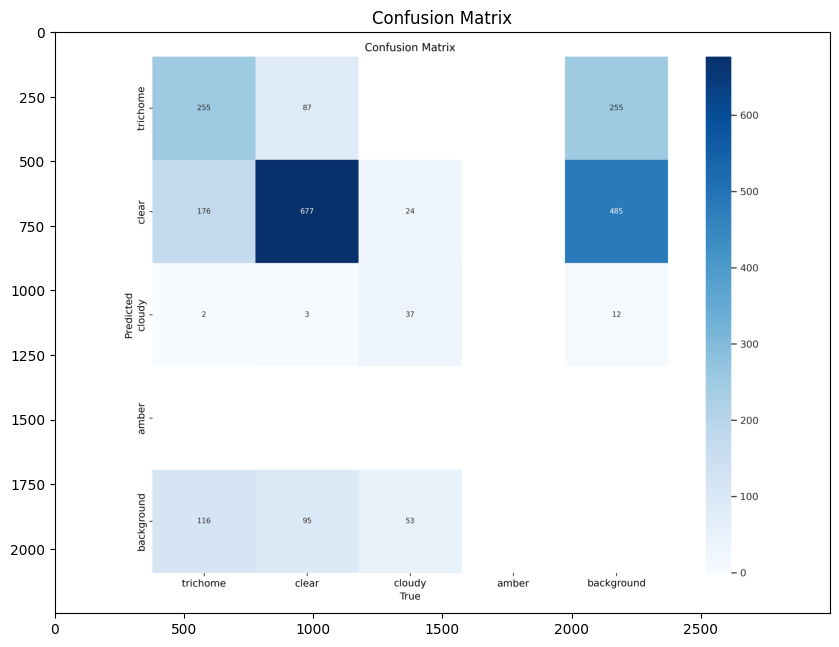

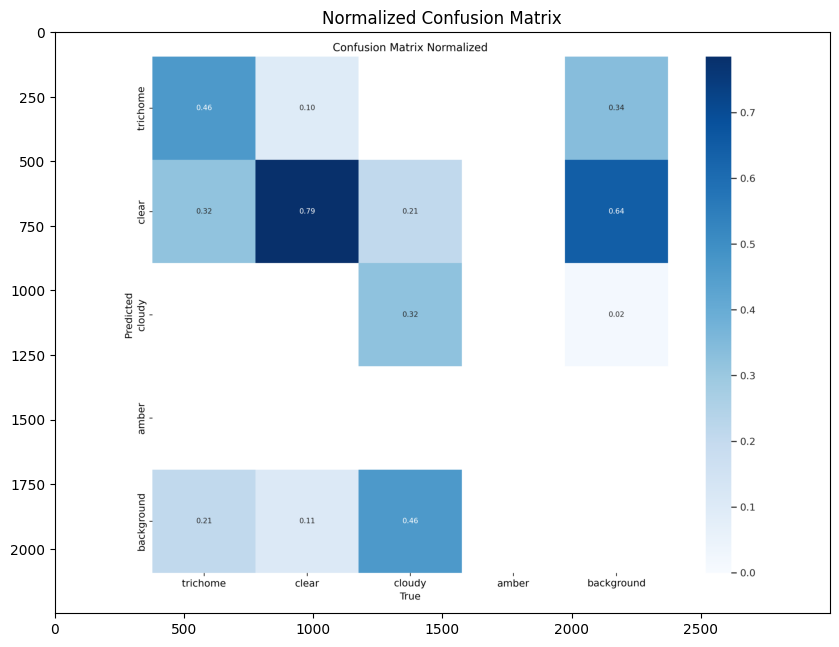

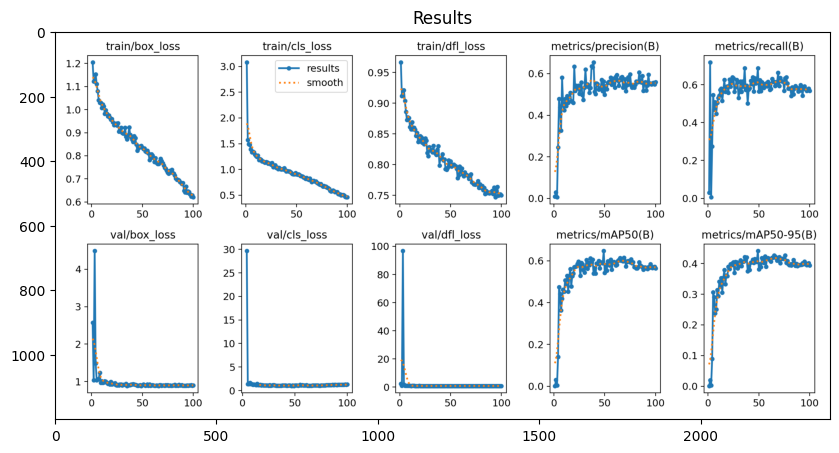

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

for model in models_best_scores:
    print(f"Model: {model}")
    score_data = models_best_scores[model]['score']
    print(f"Score: {score_data}")

    # Plot confusion matrix
    plt.figure(figsize=(10, 10))
    plt.imshow(mpimg.imread(models_best_scores[model]["conf_matrix_path"]))
    plt.title("Confusion Matrix")
    plt.show()

    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plt.imshow(mpimg.imread(models_best_scores[model]["normalized_conf_matrix_path"]))
    plt.title("Normalized Confusion Matrix")
    plt.show()

    # Plot results
    plt.figure(figsize=(10, 10))
    plt.imshow(mpimg.imread(models_best_scores[model]["results_path"]))
    plt.title("Results")
    plt.show()


### Compare between models scores

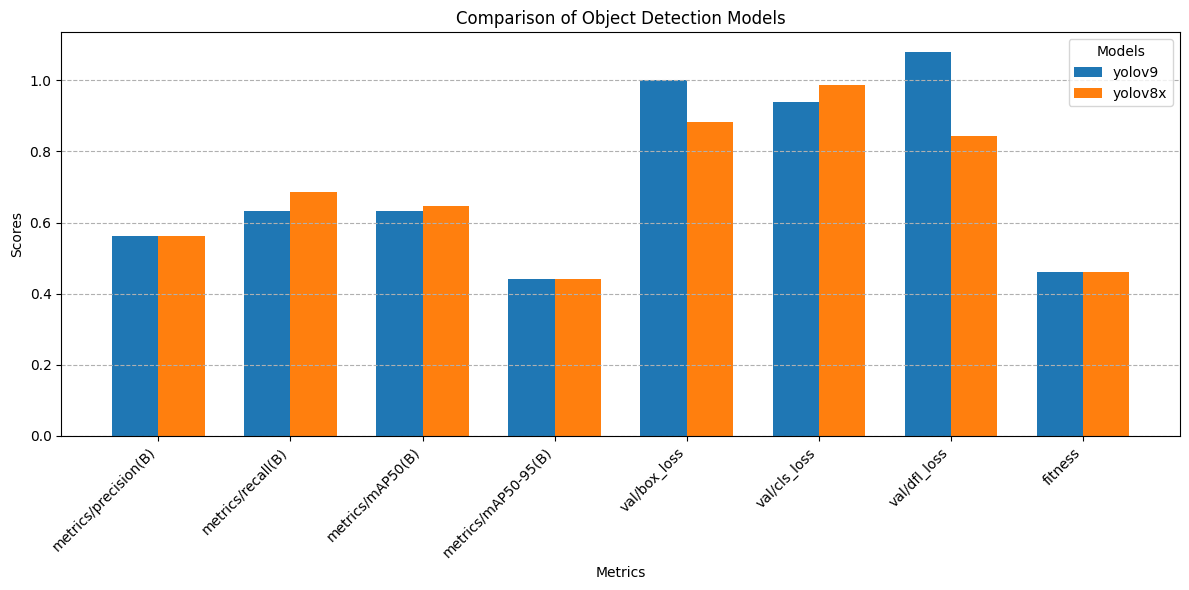

In [9]:
# Extract models and metrics
models = list(models_best_scores.keys())
metrics = list(models_best_scores[models[0]]["score"].keys())

# Prepare data for the grouped bar chart
bar_width = 0.35
index = np.arange(len(metrics))

# Gather scores for each model
scores = [np.array([models_best_scores[model]["score"].get(metric, 0) for metric in metrics]) for model in models]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
for i, model_scores in enumerate(scores):
    ax.bar(index + i * bar_width, model_scores, bar_width, label=models[i])

# Labels and Titles
ax.set_xlabel("Metrics")
ax.set_ylabel("Scores")
ax.set_title("Comparison of Object Detection Models")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics, rotation=45, ha="right")
ax.legend(title="Models")
ax.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()